# Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.


## Check the data
There are two csv files, movie_ratings_16_17.csv, fandango_score_comparison.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango_score = pd.read_csv('fandango_score_comparison.csv')
print(fandango_score.shape[0])
fandango_score.head()

146


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
movie_rating = pd.read_csv('movie_ratings_16_17.csv')
movie_rating.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
fandango_score.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [5]:
fandango = fandango_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [6]:
rating = movie_rating[['movie', 'year', 'fandango']]

In [7]:
fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
rating.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Isolate the films in 205 and 2016 for analysis

In [9]:
f_2015 = fandango[fandango.FILM.str.contains(r'\(2015\)')]
r_2016 = rating[rating.year==2016]

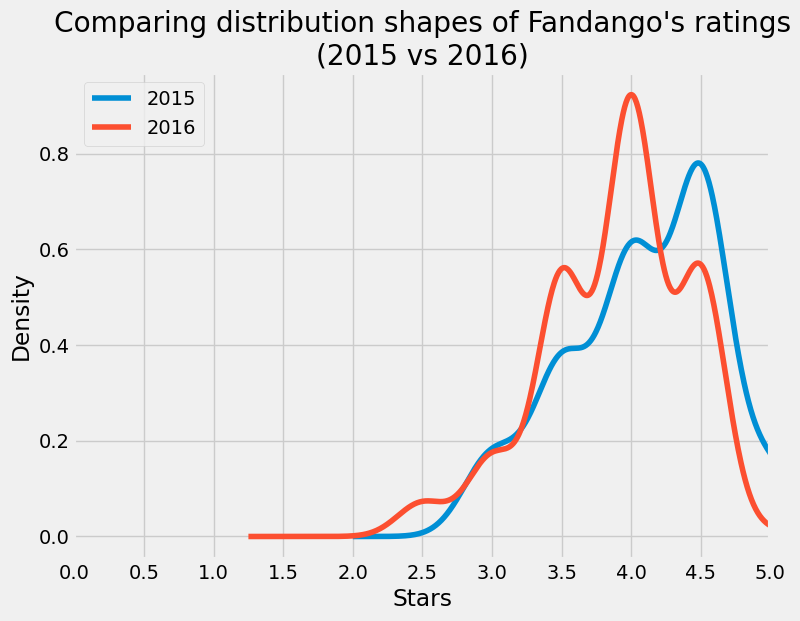

In [10]:
plt.style.use('fivethirtyeight')
f_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8, 6))
r_2016['fandango'].plot.kde(label='2016', legend=True, figsize=(8, 6))
plt.xticks(np.arange(0, 5.1, 0.5))
plt.xlabel('Stars')
plt.title("Comparing distribution shapes of Fandango's ratings\n(2015 vs 2016)")
plt.xlim([0, 5])
plt.show()

The shape of 2016 moves slightly left compared with that of 2015.They both shows left skewed.

<Axes: ylabel='Density'>

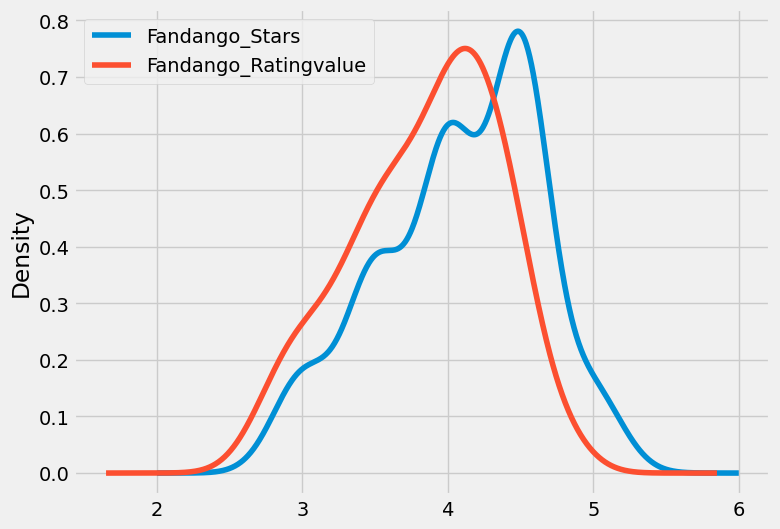

In [11]:
f_2015['Fandango_Stars'].plot.kde(label='Fandango_Stars', legend=True, figsize=(8, 6))
f_2015['Fandango_Ratingvalue'].plot.kde(label='Fandango_Ratingvalue', legend=True, figsize=(8, 6))

## Comparing Relative Frequencies

<Axes: xlabel='Fandango_Stars'>

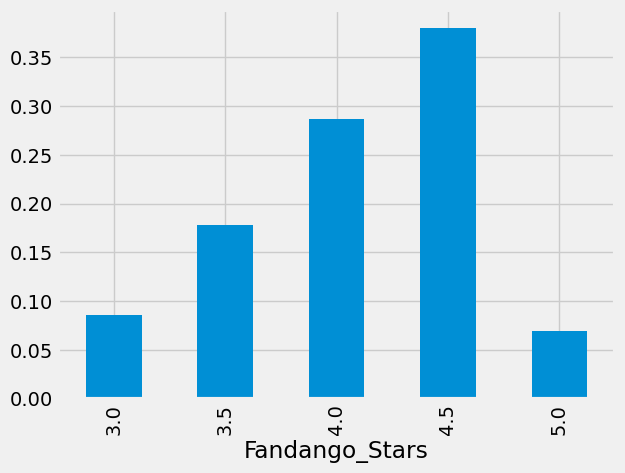

In [12]:
f_2015['Fandango_Stars'].value_counts(normalize=True).sort_index().plot.bar()
# r_2016['fandango'].value_counts(normalize=True).sort_index().plot.bar()

2016
----------------


<Axes: xlabel='fandango'>

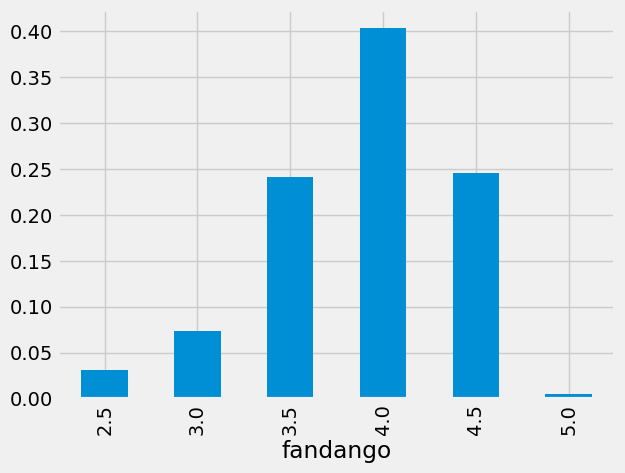

In [13]:
print('2016'+'\n'+16*'-')
r_2016['fandango'].value_counts(normalize=True).sort_index().plot.bar()

<Axes: ylabel='Frequency'>

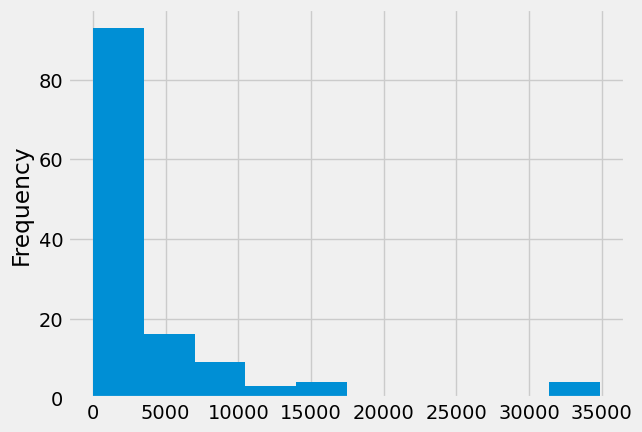

In [14]:
f_2015['Fandango_votes'].plot.hist()

The samples are purposive sampled. Only the rating with votes more than 30 are recorded. The data before Hickey's analysis and after Hickey's analysis are all purposive sampled.

## Determining the Direction of the Change

In [15]:
mean_2015 = f_2015['Fandango_Stars'].mean()
median_2015 = f_2015['Fandango_Stars'].median()
mode_2015 = f_2015['Fandango_Stars'].mode()[0]

mean_2016 = r_2016['fandango'].mean()
median_2016 = r_2016['fandango'].median()
mode_2016 = r_2016['fandango'].mode()[0]

In [16]:
rating_summary = pd.DataFrame()
rating_summary['2015'] = [mean_2015, median_2015, mode_2015]
rating_summary['2016'] = [mean_2016, median_2016, mode_2016]
rating_summary.index = ['mean', 'median', 'mode']
rating_summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


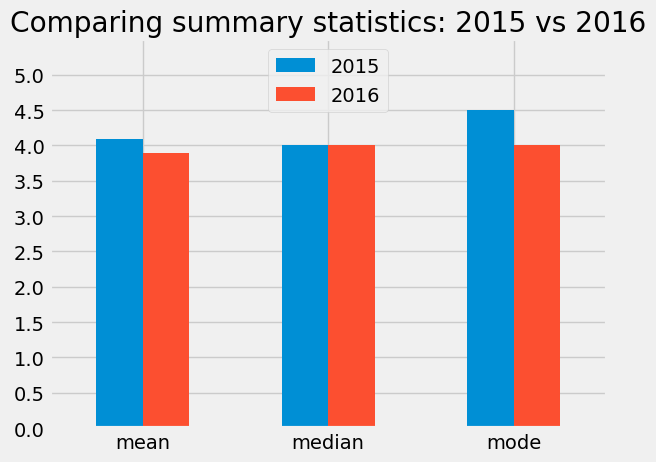

In [17]:
plt.style.use('fivethirtyeight')
rating_summary[['2015', '2016']].plot.bar(rot=0, width=0.5)
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.0)
plt.ylim(0,5.5)
plt.yticks(np.arange(0, 5.1, 0.5))
plt.legend(loc = 'upper center')
plt.show()

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.


## Conclusion
Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system following Hickey's analysis.